In [2]:
import easyocr
import argparse
import cv2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import nltk
import re 
from nltk.tokenize import word_tokenize 
from nltk.corpus import wordnet
from PIL import Image

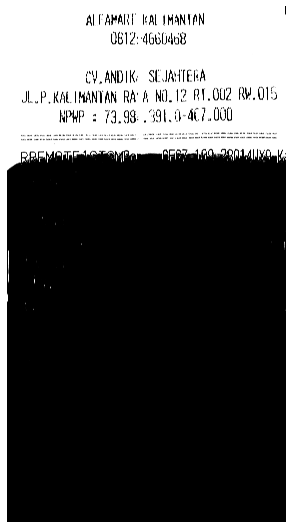

In [62]:
image = cv2.imread("dataset-struk-alfa/9iuq3aoh_4x.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = cv2.resize(gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)
blur = cv2.GaussianBlur(gray, (5,5), 0)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
roi = cv2.bitwise_not(thresh)
plt.figure(figsize=(5,10))
plt.axis("Off")
plt.imshow(roi, cmap='gray')

In [58]:
reader = easyocr.Reader(['en'])
result = reader.readtext("dataset-struk-alfa/9iuq3aoh_4x.jpg")#("9iuq3aoh_4x.k")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [59]:
result

[([[1197, 69], [3129, 69], [3129, 352], [1197, 352]],
  'AL FAMAR| KAL IMANTAN',
  0.2680059184332706),
 ([[1588, 367], [2842, 367], [2842, 646], [1588, 646]],
  '08128 4660468',
  0.49467325381007704),
 ([[1183, 944], [3146, 944], [3146, 1245], [1183, 1245]],
  '(V.AND IK  , SEJJAHTERA',
  0.23317188657402318),
 ([[481, 1224], [4263, 1224], [4263, 1563], [481, 1563]],
  "P.KAL VMANTAN RA' A  NO. 12 RT.002 RM.015",
  0.1059820174597804),
 ([[778, 1590], [1248, 1590], [1248, 1846], [778, 1846]],
  'NPHP',
  0.9925127029418945),
 ([[1486, 1580], [2755, 1580], [2755, 1874], [1486, 1874]],
  '73.98: . 391. 0',
  0.31684330777418257),
 ([[2729, 1697], [2802, 1697], [2802, 1726], [2729, 1726]],
  'HUa (Ujc"',
  0.1069778926209351),
 ([[2790, 1550], [3566, 1550], [3566, 1835], [2790, 1835]],
  '407 _ UOO',
  0.318232065749808),
 ([[2730, 1987], [2814, 1987], [2814, 2008], [2730, 2008]],
  '(HJM) M@',
  0.11926977944328028),
 ([[2837, 1987], [2915, 1987], [2915, 2008], [2837, 2008]],
  'Uuix',

In [55]:
total_confidence = 0
for confidence in result:
    total_confidence += confidence[2]
mean_confidence = total_confidence/len(text)
mean_confidence

0.40387124880011077

In [60]:
total_confidence_upscale = 0
for confidence_upscale in result:
    total_confidence_upscale += confidence_upscale[2]
mean_confidence_upscale = total_confidence_upscale/len(text)
mean_confidence_upscale

0.8321038920550242

In [61]:
text = []
for string in result:
    text.append(string[1])
text = [x.lower() for x in text]
text

['al famar| kal imantan',
 '08128 4660468',
 '(v.and ik  , sejjahtera',
 "p.kal vmantan ra' a  no. 12 rt.002 rm.015",
 'nphp',
 '73.98: . 391. 0',
 'hua (ujc"',
 '407 _ uoo',
 '(hjm) m@',
 'uuix',
 'ang',
 'ivn',
 'unv',
 '#oidgul',
 'loxldd)',
 'hnm',
 'mo)(odj',
 'jon) d',
 'coiun0',
 'hjuubiw',
 'mi',
 'hului',
 'lolog 0',
 '@jomil',
 'wjnid] u1ju 16j',
 'ulon',
 'i(lo',
 'o',
 'iiu xu',
 'motm',
 'anbo $o',
 'omxmui',
 'd)66to)',
 'jo) ()y)',
 '6j no)u',
 "'65) 0dlo",
 '6) auulne',
 'dad',
 'adi',
 'mntii)',
 'mio',
 'cowud)',
 'nictt 7',
 'onobn',
 'udu) d[u',
 'mmid',
 'jaljd',
 'oxwoo',
 'jodminu',
 'jjoiq',
 'dujioi0j',
 'dome',
 'auut=',
 'aiotd',
 'bn wuj',
 'idimo)',
 'bflm)',
 'ddm)',
 'd0il o1',
 'wdmi',
 'ldjf',
 'rremote istsmbol',
 'cf67-|09-280|4uk9 k',
 'qor | rev',
 '42 *',
 '423',
 '{el 62 401~',
 'minoi !',
 '40 2',
 'e vv',
 'can',
 'colb',
 'lj):',
 '0,',
 'l,',
 'g1014',
 '"o',
 'lanj',
 'ce1',
 '{~',
 '(f=',
 'oa',
 'dln',
 'euia',
 '445',
 'majorette racng',
 

In [7]:
nyari_pakain=[]
for i in text:
    if 'kasir' in i:
        nyari_pakain.append(i)
        
nyari_pakain

['b989-205-2107hkm3 kasir']

In [8]:
text[1:3]
    

['cihuja ', 'jl mh thahrin no 9 cikokol']